# Imports

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
plt.style.use('ggplot')


# Get data

In [127]:
# read the dataset as dataframe 
fileName = 'movies.csv'
df_raw = pd.read_csv('../../_data/_raw/' + fileName)
df = df_raw.copy()


# Explore the data

In [128]:
print(df.describe())


              year        score         votes        budget         gross  \
count  7668.000000  7665.000000  7.665000e+03  5.497000e+03  7.479000e+03   
mean   2000.405451     6.390411  8.810850e+04  3.558988e+07  7.850054e+07   
std      11.153508     0.968842  1.633238e+05  4.145730e+07  1.657251e+08   
min    1980.000000     1.900000  7.000000e+00  3.000000e+03  3.090000e+02   
25%    1991.000000     5.800000  9.100000e+03  1.000000e+07  4.532056e+06   
50%    2000.000000     6.500000  3.300000e+04  2.050000e+07  2.020576e+07   
75%    2010.000000     7.100000  9.300000e+04  4.500000e+07  7.601669e+07   
max    2020.000000     9.300000  2.400000e+06  3.560000e+08  2.847246e+09   

           runtime  
count  7664.000000  
mean    107.261613  
std      18.581247  
min      55.000000  
25%      95.000000  
50%     104.000000  
75%     116.000000  
max     366.000000  


In [129]:
df.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


# Add and Modify Columns

### Rename 'Gross' to avoid confusion with gross profit

In [130]:
df.rename(columns = {'gross' : 'gross revenue'}, inplace=True)


### Split 'released' into columns for month, day, year

In [131]:
# split released
df[['release month', 'release day', 'release year', 'other']] = df['released'].str.split(' ', n=3, expand=True)

df['release day'] = df['release day'].str.replace(',','') # loose the , in day and make it at int
# some of the values in 'released' are not full dates... drop those
months = ['June', 'July', 'May', 'December', 'October', 'September',
       'February', 'April', 'August', 'March', 'November', 'January']

df = df[df['release month'].isin(months)]
df = df[df['release day'].astype(int) <= 31]

df['release day'] = df['release day'].astype(int)
df['release year'] = df['release year'].astype(int)


### Add other columns release date related columns

In [132]:
# rebuild a valid 'release date' column
from time import strptime
df['release month num'] = [strptime(str(x), '%B').tm_mon for x in df['release month']]
df['release date'] = pd.to_datetime(df['release month num'].astype(str) +'-'+ df['release day'].astype(str) +'-'+ df['release year'].astype(str))

# add a 'release quater' column
df['release quarter'] = (df['release month num'].astype(int)-1)//3 + 1

# add 'release day of week' column
df['release day of week'] = df['release date'].dt.day_name()

# show that all release date related attributes are valid
print(df['release day of week'].unique())
print(df['release day'].unique())
print(df['release year'].unique())

# show that quarter values are correctly mapped to months
print(df.groupby(['release month num', 'release month','release quarter']).size().reset_index().rename(columns={0:'count'}))


['Friday' 'Wednesday' 'Thursday' 'Saturday' 'Monday' 'Tuesday' 'Sunday']
[13  2 20 25  9 19 16 17 26 12  3  8 15 24  1  6 21 18 10 30  7 27 31 11
 28  5 23 22 14 29  4]
[1980 1981 1984 1983 1982 1987 1985 1986 1988 1990 1989 1992 2008 1991
 1993 1999 2001 2016 1997 1994 1995 1998 2019 1996 2000 2014 2002 2003
 2005 2004 2006 2007 2010 2011 2009 2013 2015 2012 2017 2018 2020]
    release month num release month  release quarter  count
0                   1       January                1    596
1                   2      February                1    611
2                   3         March                1    678
3                   4         April                2    641
4                   5           May                2    574
5                   6          June                2    558
6                   7          July                3    581
7                   8        August                3    735
8                   9     September                3    649
9                  10 

# Handle Missing Values

name - 0.00%
rating - 1.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.04%
votes - 0.04%
director - 0.00%
writer - 0.03%
star - 0.01%
country - 0.01%
budget - 27.97%
gross revenue - 2.35%
company - 0.20%
runtime - 0.03%
release month - 0.00%
release day - 0.00%
release year - 0.00%
other - 0.00%
release month num - 0.00%
release date - 0.00%
release quarter - 0.00%
release day of week - 0.00%


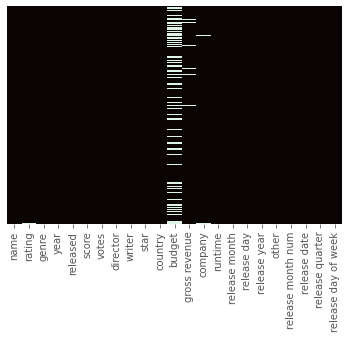

In [133]:
# Find missing values
def list_missing(df):
    for col in df.columns:
        percent_missing = np.mean(df[col].isnull())
        print(f'{col} - {percent_missing*100:.2f}%')
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='mako')
    plt.show()

list_missing(df)


## Imput Missing Budget Values

In [134]:
# Not Implemented

# method 1: define a linear regression model to predict the budget <- Moy working on this
# method 2: imput the average budget based on some other feature values

## Drop Remaining Missing Values

name - 0.00%
rating - 0.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
gross revenue - 0.00%
company - 0.00%
runtime - 0.00%
release month - 0.00%
release day - 0.00%
release year - 0.00%
other - 0.00%
release month num - 0.00%
release date - 0.00%
release quarter - 0.00%
release day of week - 0.00%


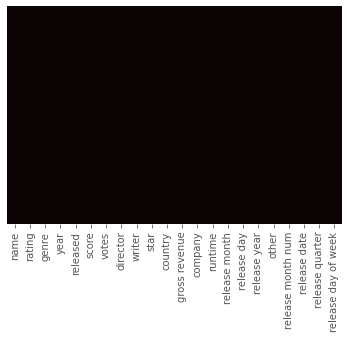

In [135]:
# if we can't reasonably imput missing budget values then drop the column
if np.mean(df['budget'].isnull()) > 0:
    df = df.drop(columns=['budget'])

# Since there is a small % of missing data for the remaining columns, we will drop all rows with any null values
df = df.dropna(how='any',axis=0)

df.drop_duplicates() #drop duplicate data as well

#double check and confirm there is NO null value in the data
list_missing(df)

# Drop Unwanted columns

In [136]:
df.drop(columns=['other', 'released', 'year'], inplace=True) #drop columns we don't need anymore

# Output to csv

In [137]:
print(df.columns)

df.to_csv('../../_data/_processed/' + 'processed_for_viz.csv', index=False)

Index(['name', 'rating', 'genre', 'score', 'votes', 'director', 'writer',
       'star', 'country', 'gross revenue', 'company', 'runtime',
       'release month', 'release day', 'release year', 'release month num',
       'release date', 'release quarter', 'release day of week'],
      dtype='object')
